## infinite monkey theorem
The goal is to figure out how long it would take a monkey to type a sensical string, or how long it takes for randomly generated characters to fall into a desired phrase. Base example originally from interactive python textbook at https://runestone.academy/runestone/static/pythonds/index.html

#### Simulate with three functions
The way we’ll simulate this is to write a function generate_string() that generates a string that is 28 characters long by choosing random letters from the 26 letters in the alphabet plus the space. 

We’ll write another function that will score each generated string by comparing the randomly generated string to the goal.

A third function will repeatedly call generate and score, then if 100% of the letters are correct we are done. If the letters are not correct then we will generate a whole new string.To make it easier to follow the program’s progress this third function will print out the best string generated so far and its score every 1000 tries.

In [1]:
import random

def generate_string(length):
    """return a string of 'length' random characters, including space"""
    alphabet = list('abcdefghijklmnopqrstuvwxyz ')
    string = ""
    for it in range(length):
        string = string + random.choice(alphabet)
    return string

In [2]:
def score(goal, test_string):
    """compare two input strings and return decimal value of quotient likeness"""
    #goal = 'methinks it is like a weasel'
    num_equal = 0
    for i in range(len(goal)):
        if goal[i] == test_string[i]:
            num_equal += 1
    return num_equal / len(goal)

In [3]:
def find_words(strings, min_length):
    """find all english words in input list that meet or exceed min_length"""
    lower_words = generate_wordlist()
    made_words = []
    for string_item in strings:
        #break each string into individual literals, stored in clump_list
        clump_list = string_item.split()
        for str_literal in clump_list:
            #add literal to made_words list if it is an english word and >= min_length
            if str_literal.lower() in lower_words and len(str_literal) >= min_length:
                made_words.append(str_literal)
    return made_words

def generate_wordlist():
    """generate and return set of  all english words for fast searching"""
    #must first download nltk data using nltk.download() copy to terminal 
    #the very first run to open gui to download required corpus for this function
    #located under the corpus tab, 'words' needs to be dl'd
    #import nltk
    #nltk.download()
    from nltk.corpus import words
    #list of all english words
    word_list = words.words()
    #put lowercased words into a set for fast searching
    return set(word.strip().lower() for word in word_list)

In [4]:
#create an n-member list consisting of lists nn-members long of random strings, 
#28 characters each as specified by generate_string()
nn = 1000
n = 10
monkey_strings = [[generate_string(20) for i in range(nn)] for i in range(n)]

text = ['Each of the following', 
         'lists are the english words found among lists of', 
         'randomly generated', 'character strings.', 'Example string:']
print(text[0], len(monkey_strings), text[1], len(monkey_strings[0]), text[2], len(monkey_strings[0][0]), text[3])
print(text[4], monkey_strings[0][0])

for string_list in monkey_strings:
    print(find_words(string_list, 3))

Each of the following 10 lists are the english words found among lists of 1000 randomly generated 20 character strings.
Example string: wdjryseirdkysaqrzgmm
['harn', 'flux', 'tig', 'kex', 'frap']
['kil', 'suk', 'ush', 'gul', 'nef']
['kyu', 'yat', 'vum']
['saxe', 'jug', 'hit', 'ova', 'mon', 'tun', 'tom', 'uro', 'gun', 'kit', 'oda']
['galt', 'pom', 'hoju', 'min', 'bor', 'kay', 'now', 'wup', 'das', 'auh']
['oes', 'spur', 'ria', 'lid', 'doc', 'ten']
['wax', 'vag', 'gib', 'rex', 'our']
['ida', 'arad', 'tynd', 'lax']
['mes', 'jow', 'loy', 'jan', 'lys', 'wet', 'dor', 'tam', 'pus', 'dar', 'oho']
['rue', 'cee', 'gnu', 'kor']


In [43]:
scores = [0]
phrase = 'methinks it is like a weasel'
total_tries = 0
scores = [[0] for it in range(10)]

#get an idea of how long it takes on average to generate a string similar to goal
for i in range(10):
    while max(scores[i]) < 0.25:
        scores[i].append(score(phrase, generate_string(len(phrase)))) 
        total_tries += 1
    print(total_tries)

23490
34130
34455
69549
79690
108318
137884
152646
171718
175723


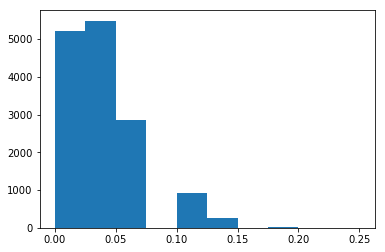

In [45]:
import matplotlib.pyplot as plt

plt.hist(max(scores))
plt.show()

## other useful functions

In [7]:
def random_list():
    from random import randint
    """return a random list of 10 consecutive words from word list"""
    from nltk.corpus import words
    
    #create list of all english words
    word_list = words.words()
    
    chunk_start = random.randint(0, len(word_list))
    for i in range(chunk_start, chunk_start+10):
        print(word_list[i])
        chunk = chunk.append(word_list[i])
    return chunk